In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage



In [ ]:
# Load the Breast Cancer Wisconsin Dataset
df_breast_cancer =pd.read_csv("/content/bdiag.csv")


In [ ]:
df_breast_cancer.head()



,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X=df_breast_cancer.iloc[:,2::]

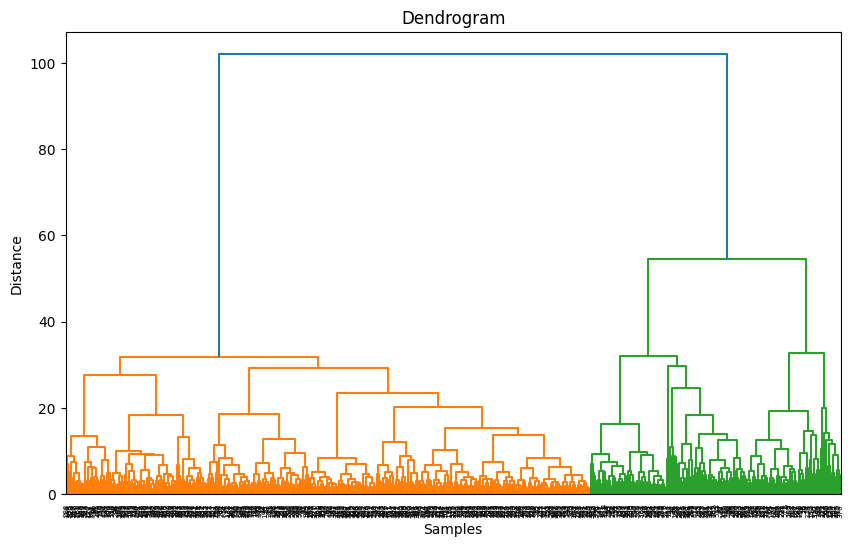

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

For n_clusters = 2, the average silhouette score is 0.34
For n_clusters = 3, the average silhouette score is 0.33
For n_clusters = 4, the average silhouette score is 0.30
For n_clusters = 5, the average silhouette score is 0.24
For n_clusters = 6, the average silhouette score is 0.12
For n_clusters = 7, the average silhouette score is 0.12
For n_clusters = 8, the average silhouette score is 0.10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


For n_clusters = 9, the average silhouette score is 0.10
For n_clusters = 10, the average silhouette score is 0.10


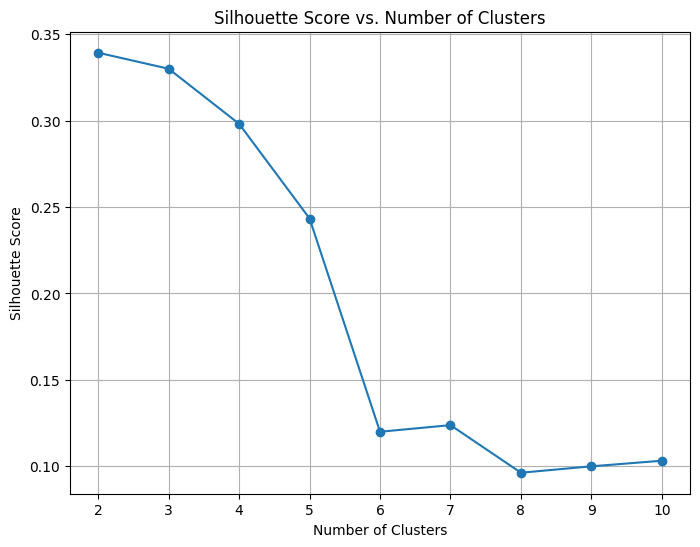

In [ ]:
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Perform hierarchical clustering
# Using Ward linkage and Euclidean distance
ward_linkage = linkage(X_normalized, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(ward_linkage, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Evaluate the clustering using Silhouette Score
silhouette_scores = []
for n_clusters in range(2, 11):  # Try different numbers of clusters
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(X_normalized)
    silhouette_avg = silhouette_score(X_normalized, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette score is {silhouette_avg:.2f}")

# Plot Silhouette Score vs. Number of Clusters
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='-')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(np.arange(2, 11))
plt.grid(True)
plt.show()


In [ ]:
# Assuming silhouette_scores is a list containing Silhouette Scores for each value of K
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 because K starts from 2
print("Optimal number of clusters (K):", optimal_k)


Optimal number of clusters (K): 2


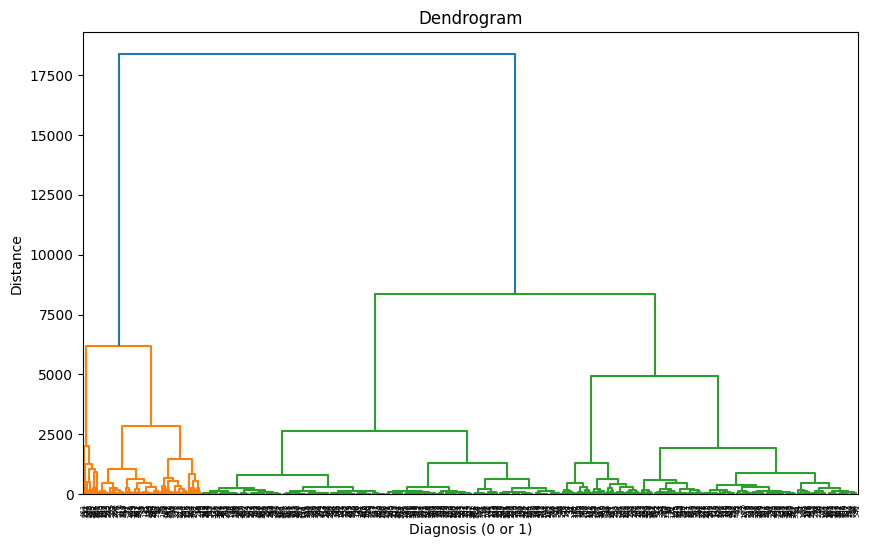

Silhouette Score: 0.6899796318793474
                     id  radius_mean  texture_mean  perimeter_mean  \
diagnosis                                                            
0          2.571846e+07    13.003435     18.811925       84.215072   
1          5.650645e+07    20.439186     21.972674      135.517442   

             area_mean  smoothness_mean  compactness_mean  concavity_mean  \
diagnosis                                                                   
0           537.381573         0.095337          0.095037        0.069702   
1          1314.844186         0.102109          0.156597        0.196055   

           concave points_mean  symmetry_mean  ...  radius_worst  \
diagnosis                                      ...                 
0                     0.037999       0.179106  ...     14.658631   
1                     0.110247       0.192710  ...     25.314535   

           texture_worst  perimeter_worst   area_worst  smoothness_worst  \
diagnosis               

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
# Perform Agglomerative Clustering
# Using Ward linkage and Euclidean distance
ward_linkage = linkage(X, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(ward_linkage, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Diagnosis (0 or 1)')
#plt.xticks(["Radius","Texture","Perimeter","Area"])
plt.ylabel('Distance')
plt.show()

# Based on the dendrogram, choose the optimal number of clusters

# Fit Agglomerative Clustering
n_clusters = 2  # Example: choosing 2 clusters
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
df_breast_cancer['diagnosis'] = agg_cluster.fit_predict(X)

# Evaluate the clustering using Silhouette Score
silhouette_avg = silhouette_score(X, df_breast_cancer['diagnosis'])
print(f'Silhouette Score: {silhouette_avg}')

# Discuss insights from clusters
cluster_insights = df_breast_cancer.groupby('diagnosis').mean()
print(cluster_insights)